In [14]:
import os
import wget
import zipfile

w= os.getcwd()+'\\data\\Nov_10.zip'
#w
#wget.download('C:\\Users\\AshwiniShitole\\Desktop\\Ashwini\\Personal\\Data Science\\Kaggle\\Wildfire Prediction Models\\data\\Nov_10.zip')

zip_handle = zipfile.ZipFile('C:\\Users\\AshwiniShitole\\Desktop\\Ashwini\\Personal\\Data Science\\Kaggle\\Wildfire Prediction Models\\data\\Nov_10.zip')
zip_handle.extractall()

import pandas as pd
import numpy as np

HistorialWildfires= 'C:\\Users\\AshwiniShitole\\Desktop\\Ashwini\\Personal\\Data Science\\Kaggle\\Wildfire Prediction Models\\Nov_10\\Historical_Wildfires.csv'
HistoricalWeather = 'C:\\Users\\AshwiniShitole\\Desktop\\Ashwini\\Personal\\Data Science\\Kaggle\\Wildfire Prediction Models\\Nov_10\\HistoricalWeather.csv'
HistoricalWeatherForecasts = 'C:\\Users\\AshwiniShitole\\Desktop\\Ashwini\\Personal\\Data Science\\Kaggle\\Wildfire Prediction Models\\Nov_10\\HistoricalWeatherForecasts.csv'
LandClass = 'C:\\Users\\AshwiniShitole\\Desktop\\Ashwini\\Personal\\Data Science\\Kaggle\\Wildfire Prediction Models\\Nov_10\\LandClass.csv'
VegetationIndex = 'C:\\Users\\AshwiniShitole\\Desktop\\Ashwini\\Personal\\Data Science\\Kaggle\\Wildfire Prediction Models\\Nov_10\\VegetationIndex.csv'


HWildfires_dataset=pd.read_csv(HistorialWildfires)
HWildfires_dataset['Date'] = pd.to_datetime(HWildfires_dataset.Date)


In [15]:
HWeather_dataset=pd.read_csv(HistoricalWeather)
HWeather_dataset['Date'] = pd.to_datetime(HWeather_dataset.Date)
# Let rename columns names
HWeather_dataset.columns = ['Date', 'Region', 'Parameter', 'area', 'min', 'max', 'mean', '2nd_moment']
HWForecasts_dataset=pd.read_csv(HistoricalWeatherForecasts)
HWForecasts_dataset['Date'] = pd.to_datetime(HWForecasts_dataset.Date)
# Let rename columns names
HWForecasts_dataset.columns = ['Date', 'Region', 'Parameter', 'Lead_time', 'area', 'min_forcast', 'max_forcast', 'mean_forcast', '2nd_moment_forcast']
LandClass_dataset=pd.read_csv(LandClass)
# Let's rename columns names--> OF=Open Forest, CF= Closed Forest.
LandClass_dataset.columns = ['Region','Shrubs','Herbaceous_vegetation','cropland','Urban_builtup','sparse_vegetation','Permanent_waterbodies','Herbaceous_wetland','CF_evergreen_broadleaf','CF_deciduous_broadleaf','CF_unknown','OF_evergreen_broadleaf','OF_deciduous_broadleaf','OF_unknown','Open_Sea']
Vegetation_dataset=pd.read_csv(VegetationIndex)
Vegetation_dataset['Date'] = pd.to_datetime(Vegetation_dataset.Date)
Hist_Weather_Pivot = HWeather_dataset.pivot_table(values=['min','max','mean','2nd_moment'],index=['Date','Region','area'],columns=['Parameter'])
# Reset dataframe index
Hist_Weather_Pivot.reset_index(inplace= True)
# Renaming Column names
Hist_Weather_Pivot.columns = [col[0] if not(col[1]) else '{1}_{0}'.format(*col) for col in Hist_Weather_Pivot.columns.values]
# Rearranging Data and column
params = Hist_Weather_Pivot.columns.tolist()[3:]
params.sort()
Hist_weather_data = Hist_Weather_Pivot[Hist_Weather_Pivot.columns.tolist()[:3] + params].copy()
Outlier1 = HWForecasts_dataset.loc[(HWForecasts_dataset.Date == "2017-10-06")&(HWForecasts_dataset.Parameter == "Precipitation")&(HWForecasts_dataset.Lead_time == 15)]
HWForecasts_dataset.index[(HWForecasts_dataset.Date == "2017-10-06")&(HWForecasts_dataset.Parameter == "Precipitation")&(HWForecasts_dataset.Lead_time == 15)]
HWForecasts_dataset.drop(HWForecasts_dataset.index[(HWForecasts_dataset.Date == "2017-10-06")&(HWForecasts_dataset.Parameter == "Precipitation")&(HWForecasts_dataset.Lead_time == 15)], inplace=True)
num_rows, num_cols = HWForecasts_dataset.shape
print("There are total {} records in the following {} columns:\n".format(num_rows, num_cols))
print("\n".join(list(HWForecasts_dataset.columns)))


There are total 217205 records in the following 9 columns:

Date
Region
Parameter
Lead_time
area
min_forcast
max_forcast
mean_forcast
2nd_moment_forcast


In [16]:
Hist_Weather_forecast_pivot=HWForecasts_dataset.pivot_table(values=['min_forcast','max_forcast','mean_forcast','2nd_moment_forcast'],index=['Date','Region','Lead_time','area'],columns=['Parameter'])
#Reset index
Hist_Weather_forecast_pivot.reset_index(inplace=True)
# Renaming Column names
Hist_Weather_forecast_pivot.columns = [col[0] if not(col[1]) else '{1}_{0}'.format(*col) for col in Hist_Weather_forecast_pivot.columns.values]
# Rearranging Data and column
params = Hist_Weather_forecast_pivot.columns.tolist()[4:]
params.sort()
Hist_Weather_forecast_data = Hist_Weather_forecast_pivot[Hist_Weather_forecast_pivot.columns.tolist()[:4] + params].copy()
Hist_Weather_forecast_data.rename(columns={'area':'area_forcast'},inplace=True)
num_rows, num_cols = Hist_Weather_forecast_data.shape
print("There are total {} records in the following {} columns:\n".format(num_rows, num_cols))
print("\n".join(list(Hist_Weather_forecast_data.columns)))
Histweather_forcastWeather_data = Hist_weather_data.merge(Hist_Weather_forecast_data, how='left', on=['Date', 'Region'])
Histweather_forcastWeather_data[Histweather_forcastWeather_data.Precipitation_2nd_moment==0]
Wildfires_HistforcastWeather = HWildfires_dataset.merge(Histweather_forcastWeather_data, how='left', on=['Date', 'Region'])
Wildfires_HistforcastWeather1 = Histweather_forcastWeather_data.merge(HWildfires_dataset, how='left', on=['Date', 'Region'])
print("Merging Historical Wildfires and Historical Weather-->")
Wildfires_HistWeather = HWildfires_dataset.merge(Hist_weather_data, how='left', on=['Date', 'Region'])
num_rows, num_cols = Wildfires_HistWeather.shape
print("There are total {} records in the following {} columns:\n".format(num_rows, num_cols))
print("\n".join(list(Wildfires_HistWeather.columns)))
print("\n***************************************************************************************")
print("Merging Historial Wildfires, Weather with Historical_Forcast Weather-->")
Wildfires_HistForcastWeather = Wildfires_HistWeather.merge(Hist_Weather_forecast_data, how='left', on=['Date', 'Region'])
num_rows, num_cols = Wildfires_HistForcastWeather.shape
print("There are total {} records in the following {} columns:\n".format(num_rows, num_cols))
print("\n".join(list(Wildfires_HistForcastWeather.columns)))
print("\n***************************************************************************************")
print("Merging Historial Wildfires, Weather, Historical_Forcast Weather with Land Class-->")
Wildfires_HistForcastWeather_Land = Wildfires_HistForcastWeather.merge(LandClass_dataset, how='left', on=['Region'])
num_rows, num_cols = Wildfires_HistForcastWeather_Land.shape
print("There are total {} records in the following {} columns:\n".format(num_rows, num_cols))
print("\n".join(list(Wildfires_HistForcastWeather_Land.columns)))
print("\n***************************************************************************************")
print("Merging Historial Wildfires, Weather, Historical_Forcast Weather ,Land Class with VegetationIndex-->")
Wildfires_HistForcastWeather_VegLand = Wildfires_HistForcastWeather_Land.merge(Vegetation_dataset, how='left', on=['Date', 'Region'])
num_rows, num_cols = Wildfires_HistForcastWeather_VegLand.shape
print("There are total {} records in the following {} columns:\n".format(num_rows, num_cols))
print("\n".join(list(Wildfires_HistForcastWeather_VegLand.columns)))
print("\n***************************************************************************************")

There are total 44620 records in the following 24 columns:

Date
Region
Lead_time
area_forcast
Precipitation_2nd_moment_forcast
Precipitation_max_forcast
Precipitation_mean_forcast
Precipitation_min_forcast
RelativeHumidity_2nd_moment_forcast
RelativeHumidity_max_forcast
RelativeHumidity_mean_forcast
RelativeHumidity_min_forcast
SolarRadiation_2nd_moment_forcast
SolarRadiation_max_forcast
SolarRadiation_mean_forcast
SolarRadiation_min_forcast
Temperature_2nd_moment_forcast
Temperature_max_forcast
Temperature_mean_forcast
Temperature_min_forcast
WindSpeed_2nd_moment_forcast
WindSpeed_max_forcast
WindSpeed_mean_forcast
WindSpeed_min_forcast
Merging Historical Wildfires and Historical Weather-->
There are total 26406 records in the following 35 columns:

Region
Date
Estimated_fire_area
Mean_estimated_fire_brightness
Mean_estimated_fire_radiative_power
Mean_confidence
Std_confidence
Var_confidence
Count
Replaced
area
Precipitation_2nd_moment
Precipitation_max
Precipitation_mean
Precipitati

In [17]:
Wildfires_HistForcastWeather_VegLand.loc[(Wildfires_HistForcastWeather_VegLand.Std_confidence.isna()) & (Wildfires_HistForcastWeather_VegLand.Var_confidence.isna()), ['Count']].drop_duplicates().reset_index(drop=True)
Wildfires_HistForcastWeather_VegLand.loc[(Wildfires_HistForcastWeather_VegLand.Std_confidence.isna()) & (Wildfires_HistForcastWeather_VegLand.Var_confidence.isna()), ['Count']].sum()
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Std_confidence.isna(),"Std_confidence"]=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Var_confidence.isna(),"Var_confidence"]=0
Wildfires_HistForcastWeather_VegLand.loc[(Wildfires_HistForcastWeather_VegLand.Precipitation_2nd_moment_forcast.isna()) & (Wildfires_HistForcastWeather_VegLand.Precipitation_2nd_moment.isna())]
rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2019-06-22")&(Wildfires_HistForcastWeather_VegLand.Region=="NSW")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'Precipitation_2nd_moment'] = 0.036972
Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2019-06-22")&(Wildfires_HistForcastWeather_VegLand.Region=="NSW")].Precipitation_2nd_moment

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2019-06-22")&(Wildfires_HistForcastWeather_VegLand.Region=="NT")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'Precipitation_2nd_moment'] = 0.040586
Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2019-06-22")&(Wildfires_HistForcastWeather_VegLand.Region=="NT")].Precipitation_2nd_moment

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2019-06-22")&(Wildfires_HistForcastWeather_VegLand.Region=="QL")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'Precipitation_2nd_moment'] = 0.014387
Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2019-06-22")&(Wildfires_HistForcastWeather_VegLand.Region=="QL")].Precipitation_2nd_moment

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2019-06-22")&(Wildfires_HistForcastWeather_VegLand.Region=="WA")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'Precipitation_2nd_moment'] = 0.014942
Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2019-06-22")&(Wildfires_HistForcastWeather_VegLand.Region=="WA")].Precipitation_2nd_moment

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2019-06-22")&(Wildfires_HistForcastWeather_VegLand.Region=="WA")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'Precipitation_min'] = 0.0
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'Precipitation_mean'] = 0.028710
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'Precipitation_max'] = 1.459202

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2019-06-22")&(Wildfires_HistForcastWeather_VegLand.Region=="QL")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'Precipitation_min'] = 0.0
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'Precipitation_mean'] = 0.020412
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'Precipitation_max'] = 1.696329

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2019-06-22")&(Wildfires_HistForcastWeather_VegLand.Region=="NT")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'Precipitation_min'] = 0.0
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'Precipitation_mean'] = 0.030774
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'Precipitation_max'] = 4.003151

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2019-06-22")&(Wildfires_HistForcastWeather_VegLand.Region=="NSW")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'Precipitation_min'] = 0.0
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'Precipitation_mean'] = 0.027396
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'Precipitation_max'] = 2.482926


rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2018-06-19")&(Wildfires_HistForcastWeather_VegLand.Region=="WA")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_2nd_moment'] = 242.712287
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_mean'] = 47.410344
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_min'] = 19.322035
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_max'] = 91.751953

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2018-06-19")&(Wildfires_HistForcastWeather_VegLand.Region=="QL")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_2nd_moment'] = 140.708168
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_mean'] = 53.782245
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_min'] = 32.930126
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_max'] = 84.519592

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2018-06-19")&(Wildfires_HistForcastWeather_VegLand.Region=="NT")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_2nd_moment'] = 136.600549
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_mean'] = 50.420410
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_min'] = 28.057907
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_max'] = 78.546043

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2018-06-19")&(Wildfires_HistForcastWeather_VegLand.Region=="NSW")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_2nd_moment'] = 121.813257
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_mean'] = 57.312320
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_min'] = 37.480415
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_max'] = 96.385735

############################################################################################################
rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2018-06-12")&(Wildfires_HistForcastWeather_VegLand.Region=="WA")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_2nd_moment'] = 258.736503
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_mean'] = 51.487786
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_min'] = 15.636713
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_max'] = 89.385307

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2018-06-12")&(Wildfires_HistForcastWeather_VegLand.Region=="QL")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_2nd_moment'] = 355.747049
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_mean'] = 49.321074
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_min'] = 23.282324
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_max'] = 95.641136

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2018-06-12")&(Wildfires_HistForcastWeather_VegLand.Region=="NT")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_2nd_moment'] = 239.432100
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_mean'] = 36.067995
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_min'] = 17.499533
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_max'] = 76.625862

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2018-06-12")&(Wildfires_HistForcastWeather_VegLand.Region=="NSW")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_2nd_moment'] = 292.028346
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_mean'] = 62.315891
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_min'] = 29.972946
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_max'] = 98.326721

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2018-06-12")&(Wildfires_HistForcastWeather_VegLand.Region=="VI")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_2nd_moment'] = 95.681929
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_mean'] = 64.127434
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_min'] = 38.397812
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_max'] = 81.640038

############################################################################################################
rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2018-06-11")&(Wildfires_HistForcastWeather_VegLand.Region=="WA")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_2nd_moment'] = 349.866466
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_mean'] = 53.517130
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_min'] = 14.944166
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_max'] = 91.297470

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2018-06-11")&(Wildfires_HistForcastWeather_VegLand.Region=="QL")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_2nd_moment'] = 276.700952
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_mean'] = 47.958362
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_min'] = 25.356884
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_max'] = 90.294876

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2018-06-11")&(Wildfires_HistForcastWeather_VegLand.Region=="NT")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_2nd_moment'] = 208.124253
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_mean'] = 32.159481
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_min'] = 17.183283
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_max'] = 76.943375

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2018-06-11")&(Wildfires_HistForcastWeather_VegLand.Region=="NSW")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_2nd_moment'] = 267.463103
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_mean'] = 64.537986
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_min'] = 38.158207
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_max'] = 96.938446

############################################################################################################
rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2014-01-11")&(Wildfires_HistForcastWeather_VegLand.Region=="WA")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_2nd_moment'] = 163.382154
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_mean'] = 28.782422
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_min'] = 11.753517
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_max'] = 84.608925

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2014-01-11")&(Wildfires_HistForcastWeather_VegLand.Region=="QL")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_2nd_moment'] = 583.908187
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_mean'] = 39.692061
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_min'] = 9.003759
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_max'] = 81.591789

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2014-01-11")&(Wildfires_HistForcastWeather_VegLand.Region=="NT")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_2nd_moment'] = 293.638045
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_mean'] = 23.141285
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_min'] = 10.311282
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_max'] = 81.372498

rowIndex = Wildfires_HistForcastWeather_VegLand[(Wildfires_HistForcastWeather_VegLand.Date=="2014-01-11")&(Wildfires_HistForcastWeather_VegLand.Region=="NSW")].index
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_2nd_moment'] = 259.725407
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_mean'] = 38.060055
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_min'] = 18.354837
Wildfires_HistForcastWeather_VegLand.loc[rowIndex, 'RelativeHumidity_max'] = 82.868942



In [18]:
Wildfires_HistForcastWeather_VegLand.Date = pd.to_datetime(Wildfires_HistForcastWeather_VegLand.Date, format="%Y-%m-%d")
Wildfires_HistForcastWeather_VegLand["year"] = Wildfires_HistForcastWeather_VegLand.Date.dt.year
Wildfires_HistForcastWeather_VegLand["month"] = Wildfires_HistForcastWeather_VegLand.Date.dt.month
Wildfires_HistForcastWeather_VegLand["week"] = Wildfires_HistForcastWeather_VegLand.Date.dt.week
Wildfires_HistForcastWeather_VegLand["day"] = Wildfires_HistForcastWeather_VegLand.Date.dt.day
Wildfires_HistForcastWeather_VegLand["day_of_week"] = Wildfires_HistForcastWeather_VegLand.Date.dt.dayofweek
Wildfires_HistForcastWeather_VegLand['SolarRadiation_2nd_moment'].fillna(method='ffill',inplace=True)
Wildfires_HistForcastWeather_VegLand['SolarRadiation_max'].fillna(method='ffill',inplace=True)
Wildfires_HistForcastWeather_VegLand['SolarRadiation_mean'].fillna(method='ffill',inplace=True)
Wildfires_HistForcastWeather_VegLand['SolarRadiation_min'].fillna(method='ffill',inplace=True)


Wildfires_HistForcastWeather_VegLand['Temperature_2nd_moment'].fillna(method='ffill',inplace=True)
Wildfires_HistForcastWeather_VegLand['Temperature_max'].fillna(method='ffill',inplace=True)
Wildfires_HistForcastWeather_VegLand['Temperature_mean'].fillna(method='ffill',inplace=True)
Wildfires_HistForcastWeather_VegLand['Temperature_min'].fillna(method='ffill',inplace=True)


Wildfires_HistForcastWeather_VegLand['WindSpeed_2nd_moment'].fillna(method='ffill',inplace=True)
Wildfires_HistForcastWeather_VegLand['WindSpeed_max'].fillna(method='ffill',inplace=True)
Wildfires_HistForcastWeather_VegLand['WindSpeed_mean'].fillna(method='ffill',inplace=True)
Wildfires_HistForcastWeather_VegLand['WindSpeed_min'].fillna(method='ffill',inplace=True)

Wildfires_HistForcastWeather_VegLand['RelativeHumidity_2nd_moment'].fillna(method='ffill',inplace=True)
Wildfires_HistForcastWeather_VegLand['RelativeHumidity_max'].fillna(method='ffill',inplace=True)
Wildfires_HistForcastWeather_VegLand['RelativeHumidity_mean'].fillna(method='ffill',inplace=True)
Wildfires_HistForcastWeather_VegLand['RelativeHumidity_min'].fillna(method='ffill',inplace=True)

Wildfires_HistForcastWeather_VegLand['Vegetation_index_mean'].fillna(method='ffill',inplace=True)
Wildfires_HistForcastWeather_VegLand['Vegetation_index_max'].fillna(method='ffill',inplace=True)
Wildfires_HistForcastWeather_VegLand['Vegetation_index_min'].fillna(method='ffill',inplace=True)
Wildfires_HistForcastWeather_VegLand['Vegetation_index_std'].fillna(method='ffill',inplace=True)
Wildfires_HistForcastWeather_VegLand['Vegetation_index_variance'].fillna(method='ffill',inplace=True)


Wildfires_HistForcastWeather_VegLand['RelativeHumidity_2nd_moment'] = Wildfires_HistForcastWeather_VegLand['RelativeHumidity_2nd_moment'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['RelativeHumidity_2nd_moment'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['RelativeHumidity_max'] = Wildfires_HistForcastWeather_VegLand['RelativeHumidity_max'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['RelativeHumidity_max'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['RelativeHumidity_mean'] = Wildfires_HistForcastWeather_VegLand['RelativeHumidity_mean'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['RelativeHumidity_mean'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['RelativeHumidity_min'] = Wildfires_HistForcastWeather_VegLand['RelativeHumidity_min'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['RelativeHumidity_min'].transform('mean'))

Wildfires_HistForcastWeather_VegLand['Vegetation_index_mean'] = Wildfires_HistForcastWeather_VegLand['Vegetation_index_mean'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['Vegetation_index_mean'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['Vegetation_index_max'] = Wildfires_HistForcastWeather_VegLand['Vegetation_index_max'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['Vegetation_index_max'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['Vegetation_index_min'] = Wildfires_HistForcastWeather_VegLand['Vegetation_index_min'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['Vegetation_index_min'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['Vegetation_index_std'] = Wildfires_HistForcastWeather_VegLand['Vegetation_index_std'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['Vegetation_index_std'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['Vegetation_index_variance'] = Wildfires_HistForcastWeather_VegLand['Vegetation_index_variance'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['Vegetation_index_variance'].transform('mean'))
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),"Lead_time"]=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'area_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'Precipitation_2nd_moment_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'Precipitation_max_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'Precipitation_mean_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'Precipitation_min_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'RelativeHumidity_2nd_moment_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'RelativeHumidity_max_forcast']=0

Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'RelativeHumidity_mean_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'Precipitation_2nd_moment_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'Precipitation_max_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'Precipitation_mean_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'Precipitation_min_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'RelativeHumidity_2nd_moment_forcast']=0

Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'RelativeHumidity_max_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'RelativeHumidity_mean_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'RelativeHumidity_min_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'SolarRadiation_2nd_moment_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'SolarRadiation_max_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'SolarRadiation_mean_forcast']=0

Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'SolarRadiation_min_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'Temperature_2nd_moment_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'Temperature_max_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'Temperature_mean_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'Temperature_min_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'WindSpeed_2nd_moment_forcast']=0

Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'WindSpeed_max_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'WindSpeed_mean_forcast']=0
Wildfires_HistForcastWeather_VegLand.loc[Wildfires_HistForcastWeather_VegLand.Lead_time.isna(),'WindSpeed_min_forcast']=0




In [19]:
Wildfires_HistForcastWeather_VegLand['Precipitation_2nd_moment_forcast'] = Wildfires_HistForcastWeather_VegLand['Precipitation_2nd_moment_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['Precipitation_2nd_moment_forcast'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['Precipitation_max_forcast'] = Wildfires_HistForcastWeather_VegLand['Precipitation_max_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['Precipitation_max_forcast'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['Precipitation_mean_forcast'] = Wildfires_HistForcastWeather_VegLand['Precipitation_mean_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['Precipitation_mean_forcast'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['Precipitation_min_forcast'] = Wildfires_HistForcastWeather_VegLand['Precipitation_min_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['Precipitation_min_forcast'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['RelativeHumidity_2nd_moment_forcast'] = Wildfires_HistForcastWeather_VegLand['RelativeHumidity_2nd_moment_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['RelativeHumidity_2nd_moment_forcast'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['RelativeHumidity_max_forcast'] = Wildfires_HistForcastWeather_VegLand['RelativeHumidity_max_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['RelativeHumidity_max_forcast'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['RelativeHumidity_mean_forcast'] = Wildfires_HistForcastWeather_VegLand['RelativeHumidity_mean_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['RelativeHumidity_mean_forcast'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['RelativeHumidity_min_forcast'] = Wildfires_HistForcastWeather_VegLand['RelativeHumidity_min_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['RelativeHumidity_min_forcast'].transform('mean'))


Wildfires_HistForcastWeather_VegLand['SolarRadiation_2nd_moment_forcast'] = Wildfires_HistForcastWeather_VegLand['SolarRadiation_2nd_moment_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['SolarRadiation_2nd_moment_forcast'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['SolarRadiation_max_forcast'] = Wildfires_HistForcastWeather_VegLand['SolarRadiation_max_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['SolarRadiation_max_forcast'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['SolarRadiation_mean_forcast'] = Wildfires_HistForcastWeather_VegLand['SolarRadiation_mean_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['SolarRadiation_mean_forcast'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['SolarRadiation_min_forcast'] = Wildfires_HistForcastWeather_VegLand['SolarRadiation_min_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['SolarRadiation_min_forcast'].transform('mean'))


Wildfires_HistForcastWeather_VegLand['Temperature_2nd_moment_forcast'] = Wildfires_HistForcastWeather_VegLand['Temperature_2nd_moment_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['Temperature_2nd_moment_forcast'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['Temperature_max_forcast'] = Wildfires_HistForcastWeather_VegLand['Temperature_max_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['Temperature_max_forcast'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['Temperature_mean_forcast'] = Wildfires_HistForcastWeather_VegLand['Temperature_mean_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['Temperature_mean_forcast'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['Temperature_min_forcast'] = Wildfires_HistForcastWeather_VegLand['Temperature_min_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['Temperature_min_forcast'].transform('mean'))


Wildfires_HistForcastWeather_VegLand['WindSpeed_2nd_moment_forcast'] = Wildfires_HistForcastWeather_VegLand['WindSpeed_2nd_moment_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['WindSpeed_2nd_moment_forcast'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['WindSpeed_max_forcast'] = Wildfires_HistForcastWeather_VegLand['WindSpeed_max_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['WindSpeed_max_forcast'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['WindSpeed_mean_forcast'] = Wildfires_HistForcastWeather_VegLand['WindSpeed_mean_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['WindSpeed_mean_forcast'].transform('mean'))
Wildfires_HistForcastWeather_VegLand['WindSpeed_min_forcast'] = Wildfires_HistForcastWeather_VegLand['WindSpeed_min_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['WindSpeed_min_forcast'].transform('mean'))

Wildfires_HistForcastWeather_VegLand['area_forcast'] = Wildfires_HistForcastWeather_VegLand['area_forcast'].fillna(Wildfires_HistForcastWeather_VegLand.groupby(['Region','month'])['area_forcast'].transform('mean'))

Wildfires_HistForcastWeather_VegLand['year_month'] = Wildfires_HistForcastWeather_VegLand.Date.dt.to_period('M')
Wildfires_HistForcastWeather_VegLand.head()


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance,year,month,week,day,day_of_week,year_month
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,...,0.994165,-0.206471,0.189638,0.03615,2005,1,1,4,1,2005-01
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,...,0.994165,-0.206471,0.189638,0.03615,2005,1,1,5,2,2005-01
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,...,0.994165,-0.206471,0.189638,0.03615,2005,1,1,6,3,2005-01
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,...,0.994165,-0.206471,0.189638,0.03615,2005,1,1,7,4,2005-01
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,...,0.994165,-0.206471,0.189638,0.03615,2005,1,1,8,5,2005-01


In [20]:
Wildfires_HistForcastWeather_VegLand.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'area', 'Precipitation_2nd_moment', 'Precipitation_max',
       'Precipitation_mean', 'Precipitation_min',
       'RelativeHumidity_2nd_moment', 'RelativeHumidity_max',
       'RelativeHumidity_mean', 'RelativeHumidity_min',
       'SoilWaterContent_2nd_moment', 'SoilWaterContent_max',
       'SoilWaterContent_mean', 'SoilWaterContent_min',
       'SolarRadiation_2nd_moment', 'SolarRadiation_max',
       'SolarRadiation_mean', 'SolarRadiation_min', 'Temperature_2nd_moment',
       'Temperature_max', 'Temperature_mean', 'Temperature_min',
       'WindSpeed_2nd_moment', 'WindSpeed_max', 'WindSpeed_mean',
       'WindSpeed_min', 'Lead_time', 'area_forcast',
       'Precipitation_2nd_moment_forcast', 'Precipitation_max_forcast',
       'Precipitation_mean_forcast', 'Precipita

In [22]:
Wildfires_HistForcastWeather_VegLand = Wildfires_HistForcastWeather_VegLand.rename(columns={'area_forcast': 'Estimated_fire_area_forcast'})
Wildfires_HistForcastWeather_VegLand.Estimated_fire_area_forcast

0        8.037682e+05
1        8.037682e+05
2        8.037682e+05
3        8.037682e+05
4        8.037682e+05
             ...     
44412    2.542548e+06
44413    2.542548e+06
44414    2.542548e+06
44415    2.542548e+06
44416    2.542548e+06
Name: Estimated_fire_area_forcast, Length: 44417, dtype: float64

In [48]:
Wildfires_HistForcastWeather_VegLand_Pivot = Wildfires_HistForcastWeather_VegLand.pivot_table(values=['Precipitation_2nd_moment_forcast'],index=['Date','Region','Estimated_fire_area','Mean_estimated_fire_brightness','Mean_estimated_fire_radiative_power','Mean_confidence','Std_confidence','Var_confidence','Count','Replaced','Precipitation_2nd_moment','Precipitation_max','Precipitation_mean','Precipitation_min','RelativeHumidity_2nd_moment','RelativeHumidity_max','RelativeHumidity_mean','RelativeHumidity_min','SoilWaterContent_2nd_moment','SoilWaterContent_max','SoilWaterContent_mean','SoilWaterContent_min','SolarRadiation_2nd_moment','SolarRadiation_max','SolarRadiation_mean','SolarRadiation_min','Temperature_2nd_moment','Temperature_max','Temperature_mean','Temperature_min','WindSpeed_2nd_moment','WindSpeed_max','WindSpeed_mean','WindSpeed_min','Estimated_fire_area_forcast','Shrubs','Herbaceous_vegetation','cropland','Urban_builtup','sparse_vegetation','Permanent_waterbodies','Herbaceous_wetland','CF_evergreen_broadleaf','CF_deciduous_broadleaf','CF_unknown','OF_evergreen_broadleaf','OF_deciduous_broadleaf','OF_unknown','Open_Sea','Vegetation_index_mean','Vegetation_index_max','Vegetation_index_min','Vegetation_index_std','Vegetation_index_variance','WindSpeed_max_forcast','WindSpeed_mean_forcast','WindSpeed_min_forcast','Temperature_mean_forcast','Temperature_min_forcast','WindSpeed_2nd_moment_forcast','Temperature_2nd_moment_forcast','Temperature_max_forcast','SolarRadiation_mean_forcast','SolarRadiation_min_forcast','RelativeHumidity_min_forcast','SolarRadiation_2nd_moment_forcast','SolarRadiation_max_forcast','RelativeHumidity_2nd_moment_forcast','RelativeHumidity_max_forcast','RelativeHumidity_mean_forcast','Precipitation_max_forcast','Precipitation_mean_forcast','Precipitation_min_forcast','year','month','week','day','day_of_week'],columns=['Lead_time'])
# Reset dataframe index
Wildfires_HistForcastWeather_VegLand_Pivot.reset_index(inplace= True)

# Renaming Column names
Wildfires_HistForcastWeather_VegLand_Pivot.columns = [col[0] if not(col[1]) else '{0}_{1}'.format(*col) for col in Wildfires_HistForcastWeather_VegLand_Pivot.columns.values]
Wildfires_HistForcastWeather_VegLand_Pivot.head()

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,Precipitation_min_forcast,year,month,week,day,day_of_week,Precipitation_2nd_moment_forcast,Precipitation_2nd_moment_forcast_5.0,Precipitation_2nd_moment_forcast_10.0,Precipitation_2nd_moment_forcast_15.0
0,2005-01-01,NT,4.945000,314.425000,47.500000,91.000000,7.071068,50.000000,4,R,...,0.000000,2005,1,53,1,5,78.305498,NaN,NaN,NaN
1,2005-01-01,QL,38.831579,322.197368,45.757895,83.315789,6.351313,40.339181,19,R,...,0.000182,2005,1,53,1,5,116.099107,NaN,NaN,NaN
2,2005-01-01,WA,36.382500,320.146875,100.750000,94.437500,6.782023,45.995833,16,R,...,0.000000,2005,1,53,1,5,44.817879,NaN,NaN,NaN
3,2005-01-02,NT,1.320000,346.000000,109.400000,100.000000,0.000000,0.000000,1,R,...,0.000000,2005,1,53,2,6,78.305498,NaN,NaN,NaN
4,2005-01-02,QL,64.464286,315.991071,58.492857,86.785714,6.361674,40.470899,28,R,...,0.000182,2005,1,53,2,6,116.099107,NaN,NaN,NaN


In [41]:
cols = Wildfires_HistForcastWeather_VegLand_Pivot.columns
for col in cols:
    print ("\n{}".format(col))
    


Date

Region

Estimated_fire_area

Mean_estimated_fire_brightness

Mean_estimated_fire_radiative_power

Mean_confidence

Std_confidence

Var_confidence

Count

Replaced

Precipitation_2nd_moment

Precipitation_max

Precipitation_mean

Precipitation_min

RelativeHumidity_2nd_moment

RelativeHumidity_max

RelativeHumidity_mean

RelativeHumidity_min

SoilWaterContent_2nd_moment

SoilWaterContent_max

SoilWaterContent_mean

SoilWaterContent_min

SolarRadiation_2nd_moment

SolarRadiation_max

SolarRadiation_mean

SolarRadiation_min

Temperature_2nd_moment

Temperature_max

Temperature_mean

Temperature_min

WindSpeed_2nd_moment

WindSpeed_max

WindSpeed_mean

WindSpeed_min

Estimated_fire_area_forcast

Shrubs

Herbaceous_vegetation

cropland

Urban_builtup

sparse_vegetation

Permanent_waterbodies

Herbaceous_wetland

CF_evergreen_broadleaf

CF_deciduous_broadleaf

CF_unknown

OF_evergreen_broadleaf

OF_deciduous_broadleaf

OF_unknown

Open_Sea

Vegetation_index_mean

Vegetation_index_max


In [51]:
#Rearranging Data and column
params = Wildfires_HistForcastWeather_VegLand_Pivot.columns.tolist()[59:]
params.sort()
Wildfires_HistForcastWeather_VegLand_data = Wildfires_HistForcastWeather_VegLand_Pivot[Wildfires_HistForcastWeather_VegLand_Pivot.columns.tolist()[:59] + params].copy()
Wildfires_HistForcastWeather_VegLand_data.head()

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_mean_forcast,SolarRadiation_min_forcast,Temperature_2nd_moment_forcast,Temperature_max_forcast,WindSpeed_2nd_moment_forcast,day,day_of_week,month,week,year
0,2005-01-01,NT,4.945000,314.425000,47.500000,91.000000,7.071068,50.000000,4,R,...,25.065700,9.867161,6.969283,37.782210,2.604837,1,5,1,53,2005
1,2005-01-01,QL,38.831579,322.197368,45.757895,83.315789,6.351313,40.339181,19,R,...,26.422061,8.503171,14.138621,37.670199,2.460686,1,5,1,53,2005
2,2005-01-01,WA,36.382500,320.146875,100.750000,94.437500,6.782023,45.995833,16,R,...,27.500829,8.414281,21.560267,38.314899,3.243455,1,5,1,53,2005
3,2005-01-02,NT,1.320000,346.000000,109.400000,100.000000,0.000000,0.000000,1,R,...,25.065700,9.867161,6.969283,37.782210,2.604837,2,6,1,53,2005
4,2005-01-02,QL,64.464286,315.991071,58.492857,86.785714,6.361674,40.470899,28,R,...,26.422061,8.503171,14.138621,37.670199,2.460686,2,6,1,53,2005


In [32]:
Wildfires_HistForcastWeather_VegLand_data.shape

(26414, 141)

In [54]:
#Wildfires_HistForcastWeather_VegLand.reset_index(drop=True, inplace=True)
lag_features = ['Std_confidence','Precipitation_max','RelativeHumidity_max','SoilWaterContent_max','SolarRadiation_max','Temperature_max','WindSpeed_max']
window1 = 3
window2 = 7
window3 = 30

Wildfires_HistForcastWeather_VegLand_rolled_3d = Wildfires_HistForcastWeather_VegLand[lag_features].rolling(window=window1, min_periods=0)
Wildfires_HistForcastWeather_VegLand_rolled_7d = Wildfires_HistForcastWeather_VegLand[lag_features].rolling(window=window2, min_periods=0)
Wildfires_HistForcastWeather_VegLand_rolled_30d = Wildfires_HistForcastWeather_VegLand[lag_features].rolling(window=window3, min_periods=0)

Wildfires_HistForcastWeather_VegLand_mean_3d = Wildfires_HistForcastWeather_VegLand_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
Wildfires_HistForcastWeather_VegLand_mean_7d = Wildfires_HistForcastWeather_VegLand_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
Wildfires_HistForcastWeather_VegLand_mean_30d = Wildfires_HistForcastWeather_VegLand_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

Wildfires_HistForcastWeather_VegLand_std_3d = Wildfires_HistForcastWeather_VegLand_rolled_3d.std().shift(1).reset_index().astype(np.float32)
Wildfires_HistForcastWeather_VegLand_std_7d = Wildfires_HistForcastWeather_VegLand_rolled_7d.std().shift(1).reset_index().astype(np.float32)
Wildfires_HistForcastWeather_VegLand_std_30d = Wildfires_HistForcastWeather_VegLand_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    Wildfires_HistForcastWeather_VegLand[f"{feature}_mean_lag{window1}"] = Wildfires_HistForcastWeather_VegLand_mean_3d[feature]
    Wildfires_HistForcastWeather_VegLand[f"{feature}_mean_lag{window2}"] = Wildfires_HistForcastWeather_VegLand_mean_7d[feature]
    Wildfires_HistForcastWeather_VegLand[f"{feature}_mean_lag{window3}"] = Wildfires_HistForcastWeather_VegLand_mean_30d[feature]
    
    Wildfires_HistForcastWeather_VegLand[f"{feature}_std_lag{window1}"] = Wildfires_HistForcastWeather_VegLand_std_3d[feature]
    Wildfires_HistForcastWeather_VegLand[f"{feature}_std_lag{window2}"] = Wildfires_HistForcastWeather_VegLand_std_7d[feature]
    Wildfires_HistForcastWeather_VegLand[f"{feature}_std_lag{window3}"] = Wildfires_HistForcastWeather_VegLand_std_30d[feature]

Wildfires_HistForcastWeather_VegLand.fillna(Wildfires_HistForcastWeather_VegLand.mean(), inplace=True)

#Wildfires_HistForcastWeather_VegLand.set_index("DATETIME", drop=False, inplace=True)
Wildfires_HistForcastWeather_VegLand.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,Temperature_max_mean_lag30,Temperature_max_std_lag3,Temperature_max_std_lag7,Temperature_max_std_lag30,WindSpeed_max_mean_lag3,WindSpeed_max_mean_lag7,WindSpeed_max_mean_lag30,WindSpeed_max_std_lag3,WindSpeed_max_std_lag7,WindSpeed_max_std_lag30
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,...,28.119364,0.727208,1.151823,1.815831,8.479050,8.479104,8.478648,0.799244,1.196098,1.612213
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,...,28.945488,0.727208,1.151823,1.815831,7.364222,7.364222,7.364222,0.799244,1.196098,1.612213
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,...,29.227804,0.399255,0.399255,0.399255,7.227681,7.227681,7.227681,0.193098,0.193098,0.193098
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,...,28.479435,1.326601,1.326601,1.326601,8.120395,8.120395,8.120395,1.552241,1.552241,1.552241
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,...,27.547594,2.380568,2.155588,2.155588,9.147921,8.701996,8.701996,1.801644,1.720274,1.720274


In [8]:
Wildfires_HistForcastWeather_VegLand.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced',
       ...
       'Temperature_max_mean_lag30', 'Temperature_max_std_lag3',
       'Temperature_max_std_lag7', 'Temperature_max_std_lag30',
       'WindSpeed_max_mean_lag3', 'WindSpeed_max_mean_lag7',
       'WindSpeed_max_mean_lag30', 'WindSpeed_max_std_lag3',
       'WindSpeed_max_std_lag7', 'WindSpeed_max_std_lag30'],
      dtype='object', length=124)

In [55]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 5, test_size = 0.30,random_state=42)
sss.get_n_splits(Wildfires_HistForcastWeather_VegLand)

sss = StratifiedShuffleSplit(n_splits = 5, test_size = 0.30,random_state=42)
for train_index, valid_index in sss.split(Wildfires_HistForcastWeather_VegLand,Wildfires_HistForcastWeather_VegLand['Region']):
    print('Train:',train_index, 'Valid:',valid_index)
    Wildfires_HistForcastWeather_VegLand_traindata = Wildfires_HistForcastWeather_VegLand.iloc[train_index]
    Wildfires_HistForcastWeather_VegLand_validdata = Wildfires_HistForcastWeather_VegLand.iloc[valid_index]

sss = StratifiedShuffleSplit(n_splits = 2, test_size = 0.50,random_state=42)
for valid_index1, test_index in sss.split(Wildfires_HistForcastWeather_VegLand_validdata,Wildfires_HistForcastWeather_VegLand_validdata['Region']):
    print('Valid:',valid_index1, 'Test:',test_index)
    Wildfires_HistForcastWeather_VegLand_test = Wildfires_HistForcastWeather_VegLand_validdata.iloc[test_index]
    Wildfires_HistForcastWeather_VegLand_validdata1 = Wildfires_HistForcastWeather_VegLand_validdata.iloc[valid_index1]
print("Training Set Shape ", Wildfires_HistForcastWeather_VegLand_traindata.shape)
print("Validation Set Shape ", Wildfires_HistForcastWeather_VegLand_validdata1.shape)
print("Test Set Shape ", Wildfires_HistForcastWeather_VegLand_test.shape)

Train: [43089 40900 25455 ... 23484 40638 11911] Valid: [34944  5855 24326 ...  1141  5052 17120]
Train: [35268 16163 40593 ... 21973 31152  3014] Valid: [20866 22234  4272 ... 28393  6824 39848]
Train: [ 4226 32466  3252 ... 11670  6938 26365] Valid: [40718 31013 41679 ... 21004 35561 40304]
Train: [ 4112 41060  5373 ... 38217 24667 15456] Valid: [26905   462 28107 ... 13283 22098 31371]
Train: [ 9861 32497 16973 ... 15142 20371 12412] Valid: [35761  9895  8414 ... 21964 17277 22365]
Valid: [12392  3104 12058 ...  5112  4842  4127] Test: [5614 1691 9415 ... 9123 2055 8410]
Valid: [ 8084  1606 10833 ...  4184 12616  7341] Test: [ 3354  6399 11493 ...  2882  4413   268]
Training Set Shape  (31091, 124)
Validation Set Shape  (6663, 124)
Test Set Shape  (6663, 124)


In [56]:
exogenous_features=['year', 'month', 'week', 'day','day_of_week','Std_confidence_std_lag3','Std_confidence_std_lag7','Std_confidence_std_lag30','Std_confidence_mean_lag30','Std_confidence_mean_lag7','Std_confidence_mean_lag3',
'Precipitation_max_std_lag3','Precipitation_max_std_lag7','Precipitation_max_std_lag30','Precipitation_max_mean_lag30','Precipitation_max_mean_lag7','Precipitation_max_mean_lag3',
'RelativeHumidity_max_std_lag3','RelativeHumidity_max_std_lag7','RelativeHumidity_max_std_lag30','RelativeHumidity_max_mean_lag30','RelativeHumidity_max_mean_lag7','RelativeHumidity_max_mean_lag3',
'SoilWaterContent_max_std_lag3','SoilWaterContent_max_std_lag7','SoilWaterContent_max_std_lag30','SoilWaterContent_max_mean_lag30','SoilWaterContent_max_mean_lag7','SoilWaterContent_max_mean_lag3',
'SolarRadiation_max_std_lag3','SolarRadiation_max_std_lag7','SolarRadiation_max_std_lag30','SolarRadiation_max_mean_lag30','SolarRadiation_max_mean_lag7','SolarRadiation_max_mean_lag3',
'Temperature_max_mean_lag30','Temperature_max_std_lag3','Temperature_max_std_lag7','Temperature_max_std_lag30','Temperature_max_mean_lag7','Temperature_max_mean_lag3',
'WindSpeed_max_std_lag3','WindSpeed_max_std_lag7','WindSpeed_max_std_lag30','WindSpeed_max_mean_lag30','WindSpeed_max_mean_lag7','WindSpeed_max_mean_lag3']

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=435359.383, Time=146.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=435352.785, Time=17.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=435353.672, Time=18.59 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=435353.667, Time=27.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=435351.923, Time=408.87 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=435356.438, Time=71.39 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 689.514 seconds


C:\Users\AshwiniShitole\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\AshwiniShitole\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


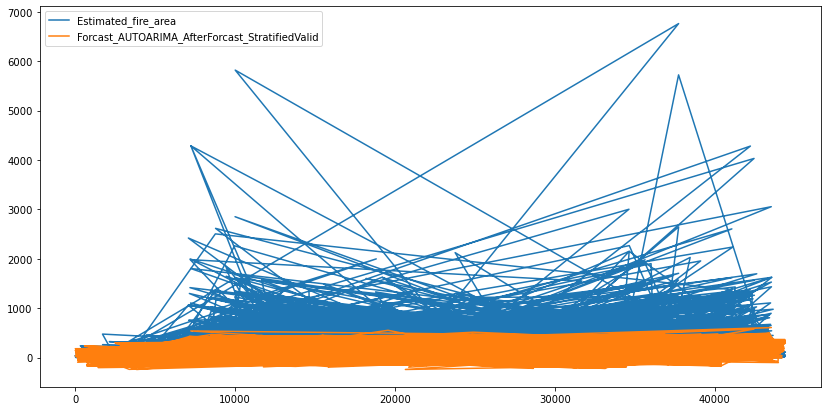

In [57]:
from pmdarima import auto_arima

model1_AUTOARIMA = auto_arima(Wildfires_HistForcastWeather_VegLand_traindata.Estimated_fire_area, exogenous=Wildfires_HistForcastWeather_VegLand_traindata[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model1_AUTOARIMA.fit(Wildfires_HistForcastWeather_VegLand_traindata.Estimated_fire_area, exogenous=Wildfires_HistForcastWeather_VegLand_traindata[exogenous_features])

forecast = model1_AUTOARIMA.predict(n_periods=len(Wildfires_HistForcastWeather_VegLand_validdata1), exogenous=Wildfires_HistForcastWeather_VegLand_validdata1[exogenous_features])
Wildfires_HistForcastWeather_VegLand_validdata1["Forcast_AUTOARIMA_AfterForcast_StratifiedValid"] = forecast

Wildfires_HistForcastWeather_VegLand_validdata1[["Estimated_fire_area", "Forcast_AUTOARIMA_AfterForcast_StratifiedValid"]].plot(figsize=(14, 7))

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(Wildfires_HistForcastWeather_VegLand_validdata1.Estimated_fire_area, Wildfires_HistForcastWeather_VegLand_validdata1.Forcast_AUTOARIMA_AfterForcast_StratifiedValid)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(Wildfires_HistForcastWeather_VegLand_validdata1.Estimated_fire_area, Wildfires_HistForcastWeather_VegLand_validdata1.Forcast_AUTOARIMA_AfterForcast_StratifiedValid))

RMSE of Auto ARIMAX: 266.2910796998715

MAE of Auto ARIMAX: 131.4136653444012


Building model with training set and validating with Valid set:
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10833
[LightGBM] [Info] Number of data points in the train set: 31091, number of used features: 47
[LightGBM] [Info] Start training from score 141.381104
Training until validation scores don't improve for 200 rounds
[200]	valid_0's l1: 153.417
Early stopping, best iteration is:
[9]	valid_0's l1: 138.928
9
Validating model with validation set:
RMSE of LightGBM: 207.1717959565314
MAE of LightGBM: 90.01548475125165


C:\Users\AshwiniShitole\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


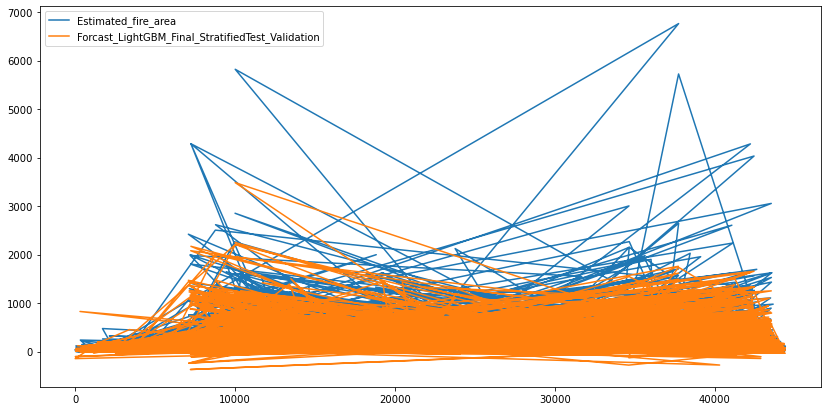

In [59]:
import lightgbm as lgb

params = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 15,
    "learning_rate": 1,
    "feature_fraction": 1,
    "reg_lambda": 6,
    "metric": "mae"
}

dtrain = lgb.Dataset(Wildfires_HistForcastWeather_VegLand_traindata[exogenous_features], label=Wildfires_HistForcastWeather_VegLand_traindata.Estimated_fire_area.values)
dvalid = lgb.Dataset(Wildfires_HistForcastWeather_VegLand_validdata1[exogenous_features])
dtest = lgb.Dataset(Wildfires_HistForcastWeather_VegLand_test[exogenous_features])

print("Building model with training set and validating with Valid set:")
model_lgb_b1 = lgb.train(params, train_set=dtrain,num_boost_round=1000, valid_sets=dvalid, verbose_eval=200, early_stopping_rounds=200)
print(model_lgb_b1.best_iteration)

print("Validating model with validation set:")
forecast = model_lgb_b1.predict(Wildfires_HistForcastWeather_VegLand_validdata1[exogenous_features],num_iteration=model_lgb_b1.best_iteration)
Wildfires_HistForcastWeather_VegLand_validdata1["Forcast_LightGBM_Final_StratifiedTest_Validation"] = forecast

print("RMSE of LightGBM:", np.sqrt(mean_squared_error(Wildfires_HistForcastWeather_VegLand_validdata1.Estimated_fire_area, Wildfires_HistForcastWeather_VegLand_validdata1.Forcast_LightGBM_Final_StratifiedTest_Validation)))
print("MAE of LightGBM:", mean_absolute_error(Wildfires_HistForcastWeather_VegLand_validdata1.Estimated_fire_area, Wildfires_HistForcastWeather_VegLand_validdata1.Forcast_LightGBM_Final_StratifiedTest_Validation))
Wildfires_HistForcastWeather_VegLand_validdata1[["Estimated_fire_area","Forcast_LightGBM_Final_StratifiedTest_Validation"]].plot(figsize=(14, 7))

# LSTM_Daily Forcasting